In [1]:
# HW 2
# Charles Wang
# ECGR-4106
# Problem 1: Part 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars] 
Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [5]:
import torch.nn as nn
import torch

In [6]:
output_price = Newtrain["price"].to_numpy(dtype=np.float32)
n_samples = output_price.size
n_samples

545

In [7]:
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

print(train_indices.size())
print(val_indices.size())

torch.Size([436])
torch.Size([109])


In [8]:
t_area = torch.tensor(Newtrain["area"].to_numpy(dtype=np.float32))
t_bedrooms = torch.tensor(Newtrain["bedrooms"].to_numpy(dtype=np.float32))
t_bathrooms = torch.tensor(Newtrain["bathrooms"].to_numpy(dtype=np.float32))
t_stories = torch.tensor(Newtrain["stories"].to_numpy(dtype=np.float32))
t_parking = torch.tensor(Newtrain["parking"].to_numpy(dtype=np.float32))
t_cost = torch.tensor(output_price)

train_t_area = t_area[train_indices]
train_t_bedrooms = t_bedrooms[train_indices]
train_t_bathrooms = t_bathrooms[train_indices]
train_stories = t_stories[train_indices]
train_parking = t_parking[train_indices]
train_cost = t_cost[train_indices]

val_t_area = t_area[val_indices]
val_t_bedrooms = t_bedrooms[val_indices]
val_t_bathrooms = t_bathrooms[val_indices]
val_stories = t_stories[val_indices]
val_parking = t_parking[val_indices]
val_cost = t_cost[val_indices]

t_train_input = torch.stack((train_t_area, train_t_bedrooms, train_t_bathrooms, train_stories, train_parking),dim=1)
t_val_input = torch.stack((val_t_area,val_t_bedrooms,val_t_bathrooms,val_stories,val_parking),dim=1)

t_train_input_n = t_train_input * 0.1
t_val_input_n = t_val_input * 0.1

print(val_t_area.shape)
print(t_val_input_n.shape)


torch.Size([109])
torch.Size([109, 5])


In [9]:
seq_model = nn.Sequential(
    nn.Linear(5, 8), # 5 input features, 8 hidden nodes
    nn.Tanh(),
    nn.Linear(8,1)
)

optimizer = torch.optim.SGD(seq_model.parameters(), lr=0.0001)

In [10]:
# Not needed anymore, call nn.MSELoss() instead
#def loss_fn(predict, actual):
#    squared_diffs = (predict - actual)**2
#    return squared_diffs.mean()

In [11]:
def training_loop(n_epochs, optimizer, model, loss_fn, tensor_input_train, t_input_val, t_c_train, t_c_val):
    
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(tensor_input_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_input_val)
    
        loss_val = loss_fn(t_p_val, t_c_val)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
    print("Epoch %d, Training Loss %f" % (epoch, float(loss_train.item())))
    print("Validation Loss %f" % (float(loss_val.item())))

In [12]:
import time
start_time = time.perf_counter_ns()

training_loop(
    n_epochs = 200,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    tensor_input_train = t_train_input_n,
    t_input_val = t_val_input_n,
    t_c_train = train_cost,
    t_c_val = val_cost
)

end_time = time.perf_counter_ns()
total_time_ms = (end_time - start_time) / 1000000

print("Total Time: %d ms" % (total_time_ms))

Epoch 200, Training Loss 14308388896768.000000
Validation Loss 16614875463680.000000
Total Time: 161 ms


/home/charles/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([436])) that is different to the input size (torch.Size([436, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/charles/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([109])) that is different to the input size (torch.Size([109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [13]:
# Problem 1: Part 2

In [14]:
seq_model = nn.Sequential(
    nn.Linear(5, 8), # 5 input features, 8 hidden nodes
    nn.Tanh(),
    nn.Linear(8,8),
    nn.Tanh(),
    nn.Linear(8,8),
    nn.Tanh(),
    nn.Linear(8,1)
)

optimizer = torch.optim.SGD(seq_model.parameters(), lr=0.001)

In [15]:
import time
start_time = time.perf_counter_ns()

training_loop(
    n_epochs = 200,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    tensor_input_train = t_train_input_n,
    t_input_val = t_val_input_n,
    t_c_train = train_cost,
    t_c_val = val_cost
)

end_time = time.perf_counter_ns()
total_time_ms = (end_time - start_time) / 1000000

print("Total Time: %d ms" % (total_time_ms))

Epoch 200, Training Loss 3626922934272.000000
Validation Loss 3184880254976.000000
Total Time: 285 ms


In [1]:
# Problem 2: Part 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import torch.nn as nn
import torch

In [2]:
from torchvision import datasets
data_path = "../dlwpt-code/p1ch7/"
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Files already downloaded and verified
Files already downloaded and verified


In [3]:
len(cifar10)

50000

In [4]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F3FA0A33640>,
 1,
 'automobile')

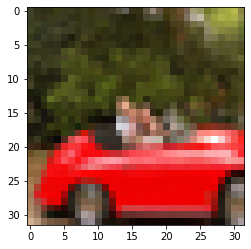

In [5]:
plt.imshow(img)
plt.show()

In [6]:
from torchvision import transforms
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [7]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [17]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform=transforms.ToTensor())
img_t, _ = tensor_cifar10[99]
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

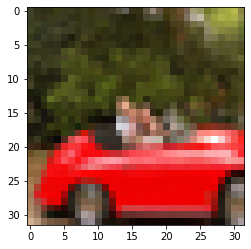

In [9]:
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [10]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
print(imgs.shape)

torch.Size([3, 32, 32, 50000])


In [11]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [12]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [13]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [14]:
#transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, 
#                                      transform=transforms.Compose([
#                                          transforms.ToTensor(),
#                                          transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
#                                      ]))
#transformed_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, 
#                                      transform=transforms.Compose([
#                                          transforms.ToTensor(),
#                                          transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
#                                      ]))

## NOTE: Normalization was not used in the notes!



In [18]:
import torch.nn as nn

train_loader = torch.utils.data.DataLoader(tensor_cifar10, batch_size=64, shuffle=True)

n_out = 10
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 300

In [19]:
import time
start_time = time.perf_counter_ns()

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
end_time = time.perf_counter_ns()

total_time_ms = (end_time - start_time) / 1000000

print("Total Time: %d ms" % (total_time_ms))

Epoch: 0, Loss: 1.984338
Epoch: 1, Loss: 2.004023
Epoch: 2, Loss: 1.568861
Epoch: 3, Loss: 1.414083
Epoch: 4, Loss: 1.885217
Epoch: 5, Loss: 1.654910
Epoch: 6, Loss: 1.451623
Epoch: 7, Loss: 1.357305
Epoch: 8, Loss: 1.514826
Epoch: 9, Loss: 1.566556
Epoch: 10, Loss: 1.616546
Epoch: 11, Loss: 1.311262
Epoch: 12, Loss: 1.550768
Epoch: 13, Loss: 1.470764
Epoch: 14, Loss: 1.944336
Epoch: 15, Loss: 1.746733
Epoch: 16, Loss: 1.805690
Epoch: 17, Loss: 0.921708
Epoch: 18, Loss: 1.445877
Epoch: 19, Loss: 1.814167
Epoch: 20, Loss: 1.812793
Epoch: 21, Loss: 1.357201
Epoch: 22, Loss: 1.799151
Epoch: 23, Loss: 1.461969
Epoch: 24, Loss: 1.203787
Epoch: 25, Loss: 2.054612
Epoch: 26, Loss: 1.268439
Epoch: 27, Loss: 1.009080
Epoch: 28, Loss: 1.865624
Epoch: 29, Loss: 1.468192
Epoch: 30, Loss: 1.700804
Epoch: 31, Loss: 0.858734
Epoch: 32, Loss: 1.230029
Epoch: 33, Loss: 1.174921
Epoch: 34, Loss: 1.372039
Epoch: 35, Loss: 1.525072
Epoch: 36, Loss: 1.231108
Epoch: 37, Loss: 1.251689
Epoch: 38, Loss: 0.941

In [20]:
val_loader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

Accuracy: %f 0.4835


In [21]:
# Part 2

n_out = 10
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512,512),
    nn.Tanh(),
    nn.Linear(512,512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 300

In [22]:
import time
start_time = time.perf_counter_ns()

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
end_time = time.perf_counter_ns()

total_time_ms = (end_time - start_time) / 1000000

print("Total Time: %d ms" % (total_time_ms))

Epoch: 0, Loss: 2.115163
Epoch: 1, Loss: 1.751902
Epoch: 2, Loss: 1.915663
Epoch: 3, Loss: 1.784431
Epoch: 4, Loss: 1.837538
Epoch: 5, Loss: 1.549647
Epoch: 6, Loss: 1.499068
Epoch: 7, Loss: 1.673488
Epoch: 8, Loss: 2.592686
Epoch: 9, Loss: 1.568397
Epoch: 10, Loss: 1.920245
Epoch: 11, Loss: 1.327689
Epoch: 12, Loss: 1.540429
Epoch: 13, Loss: 1.638968
Epoch: 14, Loss: 1.742757
Epoch: 15, Loss: 1.428038
Epoch: 16, Loss: 1.589386
Epoch: 17, Loss: 1.340539
Epoch: 18, Loss: 1.623624
Epoch: 19, Loss: 1.431394
Epoch: 20, Loss: 1.146482
Epoch: 21, Loss: 1.330903
Epoch: 22, Loss: 1.330649
Epoch: 23, Loss: 1.625561
Epoch: 24, Loss: 1.298224
Epoch: 25, Loss: 1.736050
Epoch: 26, Loss: 1.334963
Epoch: 27, Loss: 1.438913
Epoch: 28, Loss: 1.745754
Epoch: 29, Loss: 1.502688
Epoch: 30, Loss: 1.625713
Epoch: 31, Loss: 1.712628
Epoch: 32, Loss: 1.392244
Epoch: 33, Loss: 1.776826
Epoch: 34, Loss: 1.675822
Epoch: 35, Loss: 1.416869
Epoch: 36, Loss: 1.295799
Epoch: 37, Loss: 1.488979
Epoch: 38, Loss: 1.317

In [23]:
val_loader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

Accuracy: %f 0.5263
